## Data Collection & Sourcing

In [8]:
import pandas as pd
df = pd.read_csv('employee_performance_data.csv')


## Preprocessing: Cleaning and Handling Missing Values

In [9]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing)


Missing values per column:
 EmployeeID               0
Age                      0
Gender                   0
Department               0
JobLevel                 0
YearsAtCompany           0
MonthlyIncome            0
PerformanceRating        0
TrainingTimesLastYear    0
OverTime                 0
WorkLifeBalance          0
JobSatisfaction          0
Attrition                0
dtype: int64


## Feature Selection and Engineering

In [10]:
df.drop(columns=["EmployeeID"], inplace=True)  # ID is non-informative

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['Department'], drop_first=True)


## Ensuring Data Integrity and Consistency

In [11]:
print("Duplicates:", df.duplicated().sum())
print("Data types:\n", df.dtypes)


Duplicates: 0
Data types:
 Age                         int64
Gender                    float64
JobLevel                    int64
YearsAtCompany              int64
MonthlyIncome               int64
PerformanceRating           int64
TrainingTimesLastYear       int64
OverTime                    int64
WorkLifeBalance             int64
JobSatisfaction             int64
Attrition                   int64
Department_Engineering       bool
Department_Finance           bool
Department_HR                bool
Department_IT                bool
Department_Marketing         bool
Department_Sales             bool
dtype: object


## Summary Statistics & Insights

In [12]:
summary = df.describe()
summary


,Age,Gender,JobLevel,YearsAtCompany,MonthlyIncome,PerformanceRating,TrainingTimesLastYear,OverTime,WorkLifeBalance,JobSatisfaction,Attrition
count,1000.000000,954.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.445000,0.498952,2.983000,19.637000,11485.477000,3.12200,4.537000,0.293000,2.494000,2.527000,0.147000
std,11.499183,0.500261,1.416587,11.333123,4940.082859,0.88425,2.884953,0.455366,1.113195,1.134265,0.354283
min,21.000000,0.000000,1.000000,0.000000,3001.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,30.000000,0.000000,2.000000,10.000000,7320.500000,3.00000,2.000000,0.000000,1.000000,1.000000,0.000000
50%,41.000000,0.000000,3.000000,19.000000,11336.500000,3.00000,5.000000,0.000000,3.000000,3.000000,0.000000
75%,50.000000,1.000000,4.000000,29.000000,15979.750000,4.00000,7.000000,1.000000,3.000000,4.000000,0.000000
max,59.000000,1.000000,5.000000,39.000000,19999.000000,5.00000,9.000000,1.000000,4.000000,4.000000,1.000000


## Pattern Detection: Correlations & Trends

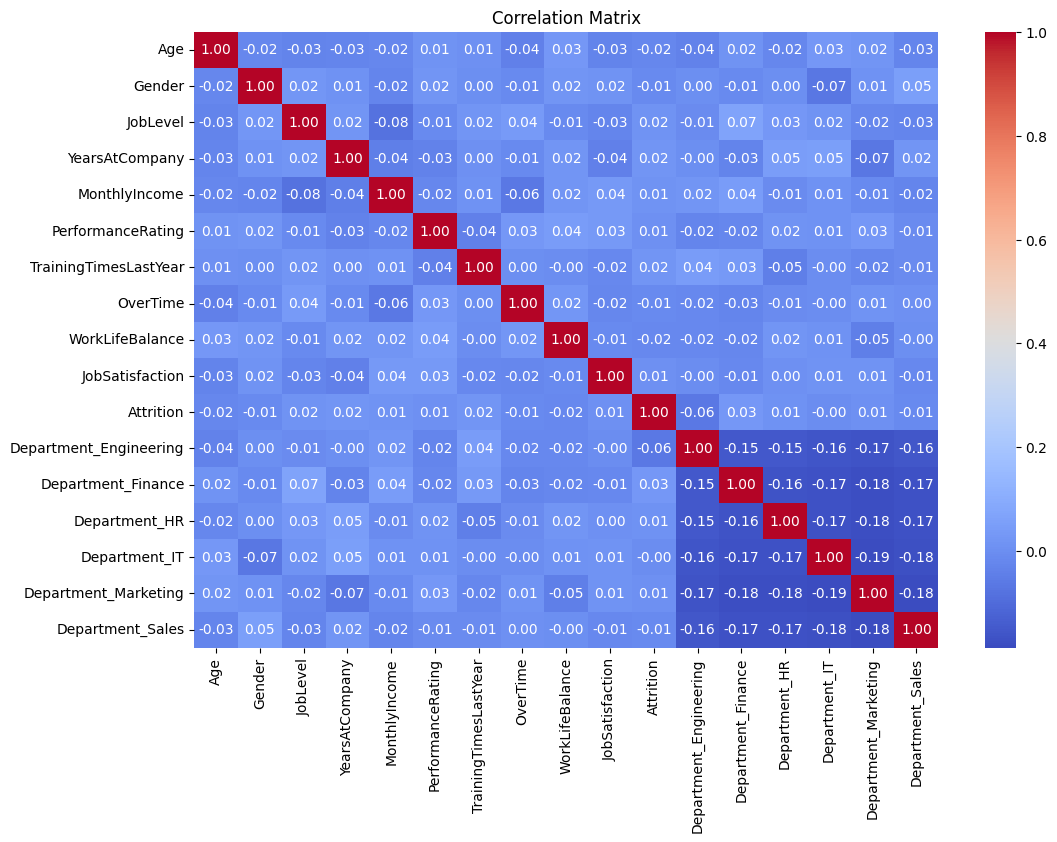

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Handling Outliers

In [ ]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['MonthlyIncome'] < Q1 - 1.5*IQR) | (df['MonthlyIncome'] > Q3 + 1.5*IQR)]
print(f"Outliers in MonthlyIncome: {len(outliers)}")


Outliers in MonthlyIncome: 0


## Initial Visual Representation: Charts and Insights

 Attrition by Department

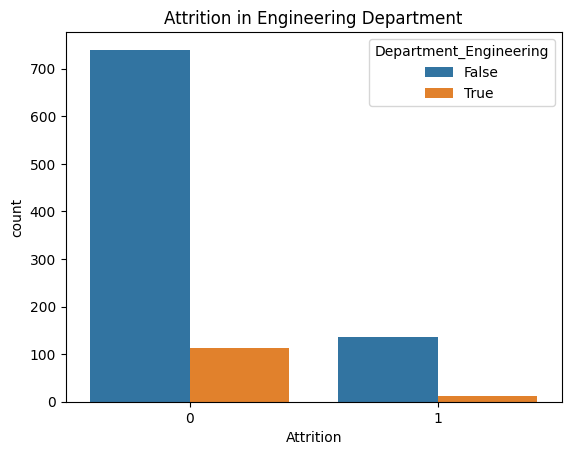

In [16]:
sns.countplot(x='Attrition', hue='Department_Engineering', data=df)
plt.title("Attrition in Engineering Department")
plt.show()


Monthly Income vs Attrition

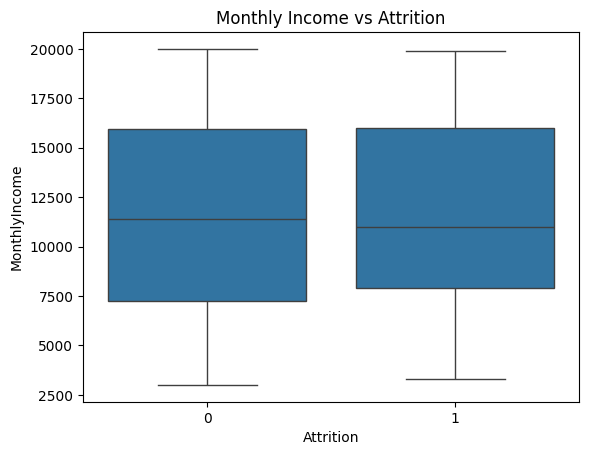

In [17]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


Job Satisfaction Distribution

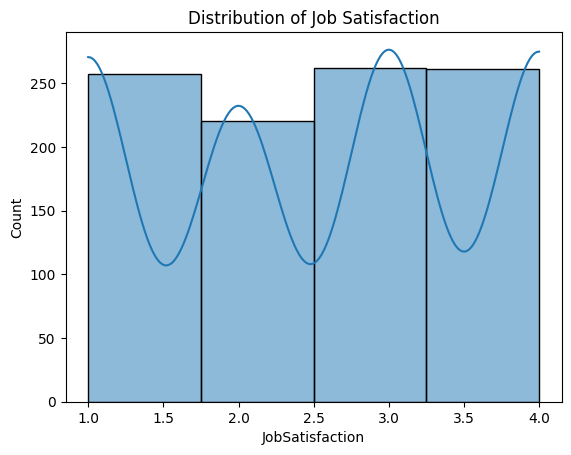

In [18]:
sns.histplot(df['JobSatisfaction'], kde=True, bins=4)
plt.title("Distribution of Job Satisfaction")
plt.show()


Heatmap (Correlation Insight)

(Already shown)



## Final Code 

In [22]:
import pandas as pd

# Use raw string to avoid escape sequence issues
file_path = r"D:\Project\DA\employee_performance_data.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Department             1000 non-null   object
 4   JobLevel               1000 non-null   int64 
 5   YearsAtCompany         1000 non-null   int64 
 6   MonthlyIncome          1000 non-null   int64 
 7   PerformanceRating      1000 non-null   int64 
 8   TrainingTimesLastYear  1000 non-null   int64 
 9   OverTime               1000 non-null   object
 10  WorkLifeBalance        1000 non-null   int64 
 11  JobSatisfaction        1000 non-null   int64 
 12  Attrition              1000 non-null   object
dtypes: int64(9), object(4)
memory usage: 101.7+ KB
None
   EmployeeID  Age  Gender   Department  JobLevel  YearsAtCompany  \
0  

In [23]:
# Re-import necessary modules after kernel reset
import pandas as pd

# Load the dataset again
file_path = r"D:\Project\DA\employee_performance_data.csv"
df = pd.read_csv(file_path)

# Display dataset structure and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Department             1000 non-null   object
 4   JobLevel               1000 non-null   int64 
 5   YearsAtCompany         1000 non-null   int64 
 6   MonthlyIncome          1000 non-null   int64 
 7   PerformanceRating      1000 non-null   int64 
 8   TrainingTimesLastYear  1000 non-null   int64 
 9   OverTime               1000 non-null   object
 10  WorkLifeBalance        1000 non-null   int64 
 11  JobSatisfaction        1000 non-null   int64 
 12  Attrition              1000 non-null   object
dtypes: int64(9), object(4)
memory usage: 101.7+ KB


(None,
    EmployeeID  Age  Gender   Department  JobLevel  YearsAtCompany  \
 0           1   59  Female      Finance         2              28   
 1           2   49    Male    Marketing         4               4   
 2           3   35    Male    Marketing         3               9   
 3           4   28    Male           HR         3              27   
 4           5   41    Male  Engineering         3              20   
 
    MonthlyIncome  PerformanceRating  TrainingTimesLastYear OverTime  \
 0          17616                  3                      1       No   
 1           7933                  5                      4       No   
 2           7926                  3                      7       No   
 3           6969                  3                      2      Yes   
 4           5965                  3                      5       No   
 
    WorkLifeBalance  JobSatisfaction Attrition  
 0                4                1        No  
 1                3                2   

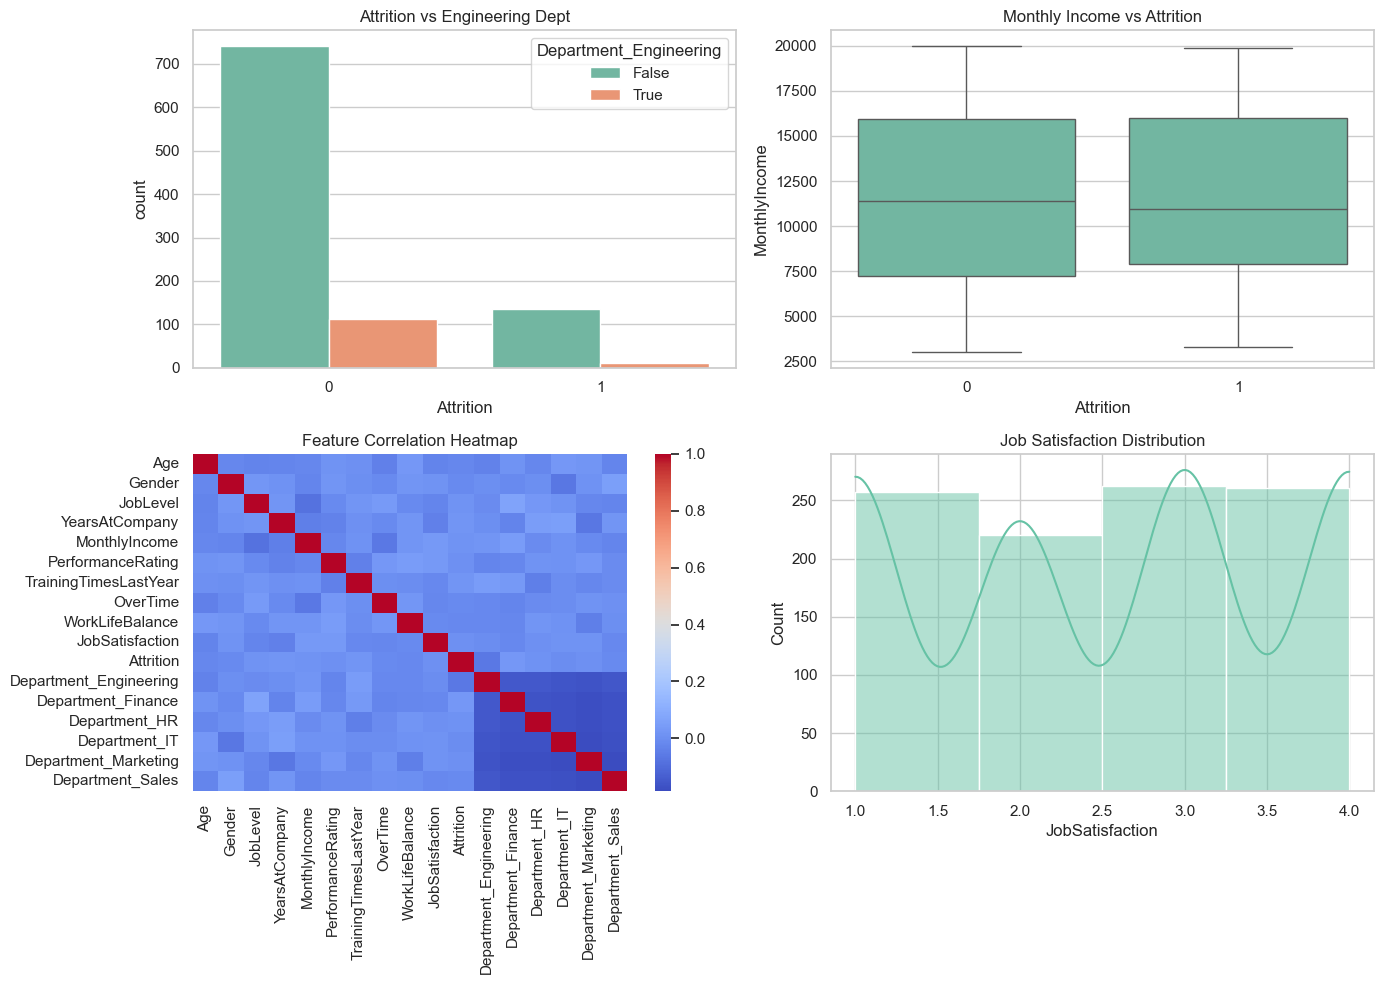

{'Missing Values': EmployeeID               0
 Age                      0
 Gender                   0
 Department               0
 JobLevel                 0
 YearsAtCompany           0
 MonthlyIncome            0
 PerformanceRating        0
 TrainingTimesLastYear    0
 OverTime                 0
 WorkLifeBalance          0
 JobSatisfaction          0
 Attrition                0
 dtype: int64,
 'Duplicates Found': np.int64(0),
 'Data Types': Age                         int64
 Gender                    float64
 JobLevel                    int64
 YearsAtCompany              int64
 MonthlyIncome               int64
 PerformanceRating           int64
 TrainingTimesLastYear       int64
 OverTime                    int64
 WorkLifeBalance             int64
 JobSatisfaction             int64
 Attrition                   int64
 Department_Engineering       bool
 Department_Finance           bool
 Department_HR                bool
 Department_IT                bool
 Department_Marketing         

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization aesthetics
sns.set(style="whitegrid", palette="Set2")

# ===============================
# 1. Identifying & Sourcing Dataset
# ===============================
# Already completed – dataset was sourced and loaded.

# ===============================
# 2. Cleaning and Handling Missing Values
# ===============================
missing_values = df.isnull().sum()

# ===============================
# 3. Feature Selection and Engineering
# ===============================
# Drop EmployeeID (non-informative)
df.drop(columns=["EmployeeID"], inplace=True)

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# One-hot encode Department
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

# ===============================
# 4. Ensuring Data Integrity
# ===============================
duplicates = df.duplicated().sum()
data_types = df.dtypes

# ===============================
# 5. Summary Statistics and Insights
# ===============================
summary_stats = df.describe()

# ===============================
# 6. Identifying Patterns, Trends, Anomalies
# ===============================
# Correlation matrix
correlation_matrix = df.corr()

# ===============================
# 7. Handling Outliers
# ===============================
# Using IQR to detect outliers in MonthlyIncome
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['MonthlyIncome'] < Q1 - 1.5 * IQR) | (df['MonthlyIncome'] > Q3 + 1.5 * IQR)]

# ===============================
# 8. Initial Visual Representation
# ===============================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Attrition by Department
sns.countplot(data=df, x='Attrition', hue='Department_Engineering', ax=axes[0,0])
axes[0,0].set_title('Attrition vs Engineering Dept')

# Boxplot of Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axes[0,1])
axes[0,1].set_title('Monthly Income vs Attrition')

# Heatmap of correlation
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, ax=axes[1,0])
axes[1,0].set_title('Feature Correlation Heatmap')

# Job Satisfaction distribution
sns.histplot(df['JobSatisfaction'], kde=True, bins=4, ax=axes[1,1])
axes[1,1].set_title('Job Satisfaction Distribution')

plt.tight_layout()
plt.show()

# Return collected analysis
{
    "Missing Values": missing_values,
    "Duplicates Found": duplicates,
    "Data Types": data_types,
    "Summary Stats": summary_stats,
    "Outlier Count (Monthly Income)": len(outliers),
    "Correlation Matrix (Top 5)": correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(5)
}
